<a href="https://colab.research.google.com/github/asokerathnayake/ML_workshop/blob/main/ML_Capstone_Asoke_Energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dialog Data Science Acadamy
# ML Training
# Capstone Project 

Asoke Rathnayake
Daily Energy Utilisation Prediction


Data Set : 12 months Daily Energy utilisation of ABC Company
Link : https://raw.githubusercontent.com/asokerathnayake/ML_workshop/main/12Months_Daily_energy.csv



In [1]:
#import libries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression


In [2]:
#load Data set 
#file_path= 'https://raw.githubusercontent.com/asokerathnayake/ML_workshop/main/12Months_hourly_energy_data.csv'
file_path= 'https://raw.githubusercontent.com/asokerathnayake/ML_workshop/main/12Months_Daily_energy.csv'
# Load CSV File
data = pd.read_csv(file_path)

In [3]:
data.sample(5)

,RefNo,Date,Year,Month,Day,WeekDay,KWH
344,345,10/7/2021,2021,10,7,5,1988.980
317,318,9/10/2021,2021,9,10,6,1418.819
18,19,11/15/2020,2020,11,15,1,1957.821
340,341,10/3/2021,2021,10,3,1,1923.984
343,344,10/6/2021,2021,10,6,4,1729.128


In [4]:
data.dtypes

RefNo        int64
Date        object
Year         int64
Month        int64
Day          int64
WeekDay      int64
KWH        float64
dtype: object

In [5]:
data = data.drop(columns = ['Date'])

In [6]:
data.dtypes

RefNo        int64
Year         int64
Month        int64
Day          int64
WeekDay      int64
KWH        float64
dtype: object

In [7]:
data.columns

Index(['RefNo', 'Year', 'Month', 'Day', 'WeekDay', 'KWH'], dtype='object')

In [8]:
rows =   len(data)
columns =  len(data.columns)
print(F"rows = {rows}, columns={columns}")

rows = 366, columns=6


In [9]:
data.describe()

,RefNo,Year,Month,Day,WeekDay,KWH
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,183.500000,2020.822404,6.535519,15.754098,4.002732,1915.589087
std,105.799338,0.382695,3.452630,8.819634,1.997942,284.284212
min,1.000000,2020.000000,1.000000,1.000000,1.000000,882.652000
25%,92.250000,2021.000000,4.000000,8.000000,2.000000,1800.851250
50%,183.500000,2021.000000,7.000000,16.000000,4.000000,1992.926000
75%,274.750000,2021.000000,10.000000,23.000000,6.000000,2095.996000
max,366.000000,2021.000000,12.000000,31.000000,7.000000,3245.618000


In [10]:
data.isna().any()

RefNo      False
Year       False
Month      False
Day        False
WeekDay    False
KWH        False
dtype: bool

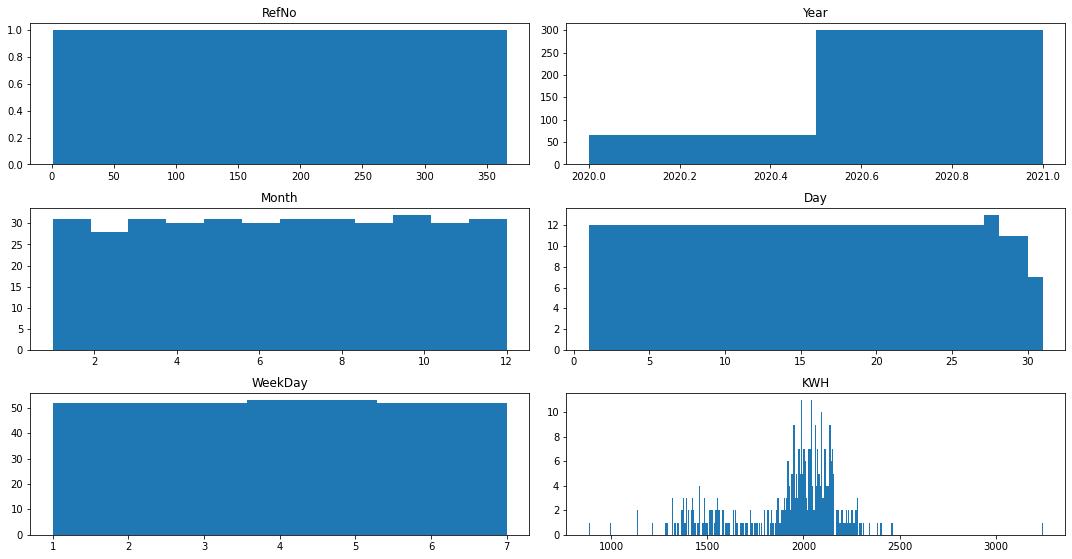

In [11]:
histfig = plt.figure(figsize=(15,12))

for i in range(data.shape[1]):
    plt.subplot(4,2, i+1)
    fig = plt.gca()
    fig.set_title(data.columns.values[i])

    vals = np.size(data.iloc[:, i].unique())
    plt.hist(data.iloc[:,i], bins=vals)
plt.tight_layout(rect=[0, 0.05, 1, 0.9])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RefNo    366 non-null    int64  
 1   Year     366 non-null    int64  
 2   Month    366 non-null    int64  
 3   Day      366 non-null    int64  
 4   WeekDay  366 non-null    int64  
 5   KWH      366 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 17.3 KB


In [13]:
data.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
RefNo,366.0,183.500000,105.799338,1.000,92.25000,183.500,274.750,366.000
Year,366.0,2020.822404,0.382695,2020.000,2021.00000,2021.000,2021.000,2021.000
Month,366.0,6.535519,3.452630,1.000,4.00000,7.000,10.000,12.000
Day,366.0,15.754098,8.819634,1.000,8.00000,16.000,23.000,31.000
WeekDay,366.0,4.002732,1.997942,1.000,2.00000,4.000,6.000,7.000
KWH,366.0,1915.589087,284.284212,882.652,1800.85125,1992.926,2095.996,3245.618


In [14]:
data.columns

Index(['RefNo', 'Year', 'Month', 'Day', 'WeekDay', 'KWH'], dtype='object')

In [15]:
data = data[['RefNo',  'Year', 'Month', 'Day', 'WeekDay', 'KWH']]

data.head()

,RefNo,Year,Month,Day,WeekDay,KWH
0,1,2020,10,28,4,1140.169
1,2,2020,10,29,5,2038.338
2,3,2020,10,30,6,1484.086
3,4,2020,10,31,7,1429.289
4,5,2020,11,1,1,1550.194


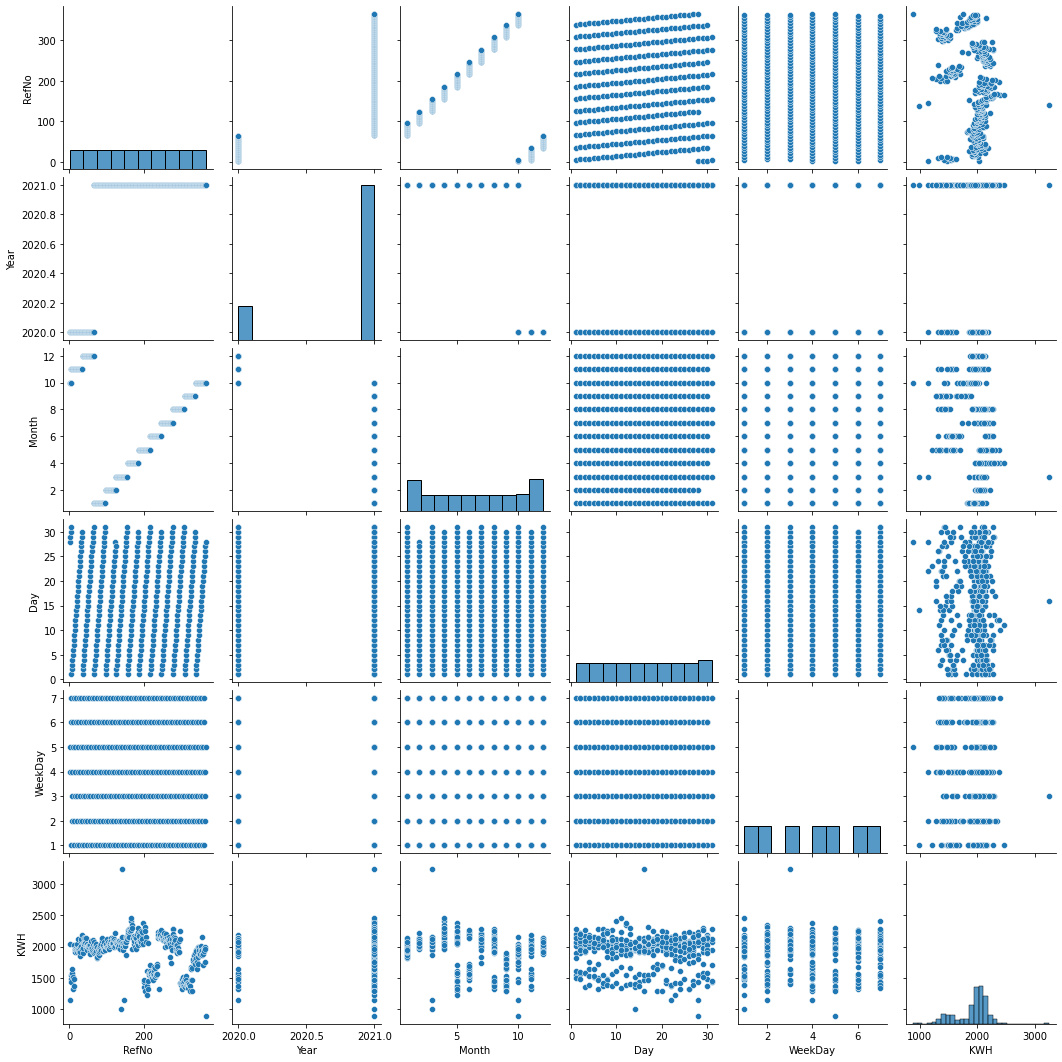

In [21]:
sns.pairplot(data[['RefNo',  'Year', 'Month', 'Day', 'WeekDay', 'KWH']])
plt.show()

In [16]:
correlation_matrix = data[['Year', 'Month', 'Day', 'WeekDay', 'KWH']].corr()
correlation_matrix

,Year,Month,Day,WeekDay,KWH
Year,1.000000,-0.657696,-0.044631,-0.002947,0.003350
Month,-0.657696,1.000000,0.015673,-0.003787,-0.236344
Day,-0.044631,0.015673,1.000000,0.007035,-0.044632
WeekDay,-0.002947,-0.003787,0.007035,1.000000,-0.000378
KWH,0.003350,-0.236344,-0.044632,-0.000378,1.000000


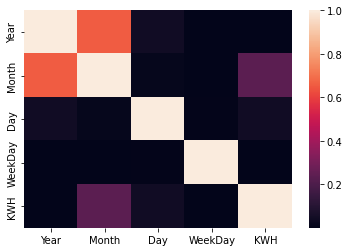

In [23]:
sns.heatmap(correlation_matrix.abs())

#Train test Split

In [110]:
X=['Year','Month', 'Day', 'WeekDay']
y='KWH'
X_train, X_test, y_train, y_test = train_test_split(data[X], data[y], test_size=0.3, random_state=42)

In [94]:
X_train.head()

,Year,Month,Day,WeekDay
268,2021,7,23,6
231,2021,6,16,4
157,2021,4,3,7
19,2020,11,16,2
147,2021,3,24,4


In [22]:
y_train.head()

,KWH
268,2124.327
231,1540.815
157,2264.087
19,1916.508
147,2009.513


In [23]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
model = linear_model.LinearRegression()
print(model)

LinearRegression()


In [98]:
def model_train(model, model_name, Coloums, X_train, y_train, X_test, y_test): 
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test[Coloums])
    result = pd.DataFrame(data={'y_act':y_test, 'y_predict':y_predict})

    coefficients = model.coef_
    intercept = model.intercept_
    pd.DataFrame(data={'features':Coloums, 'coefficients':coefficients})
    mse = mean_squared_error(result[y_test], result[y_predict])
    rmse = np.sqrt(mse)
    r2 = r2_score(result[y_test], result[y_predict])

    return  ({'model_name': model_name ,
    'model':model,
             'intercept':intercept, 
             'mse':mse,
             'rmse':rmse,
             'r2':r2,})

In [99]:
def mod_results(model_obj):
    modelout = pd.DataFrame([[model_obj['model_name'], 
                        model_obj['intercept'],
                        model_obj['mse'],
                        model_obj['rmse'],
                        model_obj['r2'] ]],

    columns = ['model_name', 'intercept', 'mse', 'rmse', 'r2']
    )
    return modelout

------------------------------------------------------

---



#Model Traning

In [ ]:
#model_train(model, model_name, Coloums, X_train, y_train, X_test, y_test)
modeltype = linear_model.LinearRegression()
Coloums = ['Year', 'Month','Day', 'WeekDay']
modellinreg = model_train(modeltype,'LinearRegression',Coloums, X_train, y_train, X_test, y_test) 
modellinreg

In [ ]:
modelresult = mod_results(modellinreg) 
modelresult 

In [ ]:
#model_train(model, model_name, Coloums, X_train, y_train, X_test, y_test)
modeltype = linear_model.LogisticRegression
Coloums = ['Year', 'Month','Day', 'WeekDay']
modellogreg = model_train(modeltype,'LogisticRegression',Coloums, X_train, y_train, X_test, y_test)
modellogreg

In [ ]:
modelresult = modelresult.append(modelresult(modellogreg), ignore_index=True)
modelresult

---------------------------------------------------------------------------------

---



Best Model 

In [ ]:
best_model = modellinreg['modeltype'] 

Save & import the model

In [ ]:
import joblib

model_file = 'best_energyprediction.joblib'
joblib.dump(best_model, open(model_file, 'wb')) 

In [ ]:
model_file = 'model_rf_entropy.joblib'
model_import = joblib.load(model_file) 
model_import

Data pre processing


In [101]:
def data_pre_process(data):
    data_processed = data.drop(columns = ['Date'])

    return data_processed

In [ ]:
def modelscore(input_data, model):
    return model.predict(input_data)

Predition

In [ ]:
def fun_prediction(dataset, model):
    predict_in = data_pre_process(dataset)
    predict_out = modelscore(predict_in, model)
    return predict_out[0]

Test prediction

In [ ]:
data_values = [[2022,11,23,4]]

data_columns = ['Year','Month', 'Day', 'WeekDay']

data_in = pd.DataFrame(data_values, columns = data_columns)

fun_prediction(data_in, model_import)

API

In [ ]:
import requests

url = 'http://127.0.0.1:5001/energyprediction'

payload = {'Year': 2022,
     'Month': 11,
     'Day': 13,
     'WeekDay': 3}    

headers = {}

files=[]

response = requests.request("POST", url, headers=headers, data=payload, files=files)

print(response.text)

################################################################################


Having an error on calling model traning fucntion, 

########################################################################

In [117]:
X=['Year','Month', 'Day', 'WeekDay']
y='KWH'
X_train, X_test, y_train, y_test = train_test_split(data[X], data[y], test_size=0.3, random_state=42)

In [118]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
model = linear_model.LinearRegression()
print(model)

LinearRegression()


In [119]:
y_actual = 'KWH'
y_predict = 'predict_KWH'
correlation_matrix[y_actual].sort_values()

Month     -0.236344
Day       -0.044632
WeekDay   -0.000378
Year       0.003350
KWH        1.000000
Name: KWH, dtype: float64

In [125]:
X = ['Year', 'WeekDay', 'Day']
# Fit
model.fit(X_train[X], y_train[y_actual])

#Find model parameters
coefficients = model.coef_
intercept = model.intercept_

print(pd.DataFrame(data={'features':X, 'coefficients':coefficients}))
print('\n') # Add new line to print
print(F"Intercept = {intercept}")

result = y_test
result[y_predict] = model.predict(X_test[X])

mse = mean_squared_error(result[y_actual], result[y_predict])
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(result[y_actual], result[y_predict])
print("R2:", r2)

KeyError: ignored

In [106]:
y_actual = 'KWH'
y_predict = 'predict_KWH'
correlation_matrix[y_actual].sort_values()

Month     -0.236344
Day       -0.044632
WeekDay   -0.000378
Year       0.003350
KWH        1.000000
Name: KWH, dtype: float64

In [54]:
result = y_test
result[y_predict] = model.predict(X_test[X])

result['abs_difference'] = (result[y_actual] - result[y_predict]).abs()
result[[y_actual, y_predict, 'abs_difference']]

,KWH,predict_KWH,abs_difference
193,2159.762,1920.275789,239.486211
33,2188.606,1931.649116,256.956884
15,1961.486,1931.649116,29.836884
310,1352.003,1920.275789,568.272789
57,2096.209,1931.649116,164.559884
...,...,...,...
158,2179.279,1920.275789,259.003211
229,1510.535,1920.275789,409.740789
361,1926.202,1920.275789,5.926211
209,2050.825,1920.275789,130.549211


In [55]:
result['abs_difference'].describe()

count     110.000000
mean      229.993441
std       217.047490
min         1.725211
25%        68.507711
50%       171.874711
75%       334.643961
max      1325.342211
Name: abs_difference, dtype: float64

In [56]:
mse = mean_squared_error(result[y_actual], result[y_predict])
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(result[y_actual], result[y_predict])
print("R2:", r2)

MSE: 99578.32651393251
RMSE: 315.5603373586936
R2: -0.0062560774816318165


In [57]:
y_actual = 'KWH'
y_predict = 'prected_KWH'
correlation_matrix[y_actual].sort_values()

Month     -0.236344
Day       -0.044632
WeekDay   -0.000378
Year       0.003350
KWH        1.000000
Name: KWH, dtype: float64

In [59]:
# Seelct variables
X = ['Year', 'WeekDay']
# Fit
model.fit(X_train[X], y_train[y_actual])
coefficients = model.coef_
intercept = model.intercept_

print(pd.DataFrame(data={'features':X, 'coefficients':coefficients}))
print('\n')
print(F"Intercept = {intercept}")

result = y_test
result[y_predict] = model.predict(X_test[X])

mse = mean_squared_error(result[y_actual], result[y_predict])
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(result[y_actual], result[y_predict])
print("R2:", r2)

  features  coefficients
0     Year    -11.475573
1  WeekDay      3.716133


Intercept = 25097.701165980357
MSE: 99901.15544967292
RMSE: 316.0714404207899
R2: -0.009518319276087706


In [123]:
y_actual = 'KWH'
y_predict = 'prected_KWH'
correlation_matrix[y_actual].abs().sort_values()

WeekDay    0.000378
Year       0.003350
Day        0.044632
Month      0.236344
KWH        1.000000
Name: KWH, dtype: float64

In [61]:
correlation_matrix[y_actual].abs().sort_values().index

Index(['WeekDay', 'Year', 'Day', 'Month', 'KWH'], dtype='object')

In [62]:
X = ['Year', 'WeekDay', 'Day']

# Fit
model.fit(X_train[X], y_train[y_actual])

#Find model parameters
coefficients = model.coef_
intercept = model.intercept_

print(pd.DataFrame(data={'features':X, 'coefficients':coefficients}))
print('\n') # Add new line to print
print(F"Intercept = {intercept}")

result = y_test
result[y_predict] = model.predict(X_test[X])

mse = mean_squared_error(result[y_actual], result[y_predict])
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(result[y_actual], result[y_predict])
print("R2:", r2)

  features  coefficients
0     Year    -11.864025
1  WeekDay      3.917107
2      Day     -0.775411


Intercept = 25893.91870924173
MSE: 99598.85680143774
RMSE: 315.59286557436263
R2: -0.006463539559955489


Normalization

In [63]:
for column in X_train.columns:
  print(F"min({column}): {X_train[column].min()}")
  print(F"max({column}): {X_train[column].max()}")
  X_train[column] = ( X_train[column] - X_train[column].min() ) / ( X_train[column].max() - X_train[column].min() )

min(Year): 2020
max(Year): 2021
min(Month): 1
max(Month): 12
min(Day): 1
max(Day): 31
min(WeekDay): 1
max(WeekDay): 7


In [64]:
for column in X_test.columns:
  print(F"min({column}): {X_test[column].min()}")
  print(F"max({column}): {X_test[column].max()}")
  X_test[column] = ( X_test[column] - X_test[column].min() ) / ( X_test[column].max() - X_test[column].min() )

min(Year): 2020
max(Year): 2021
min(Month): 1
max(Month): 12
min(Day): 1
max(Day): 31
min(WeekDay): 1
max(WeekDay): 7


In [65]:
# Seelct variables
X = X_train.columns

# Fit
model.fit(X_train[X], y_train[y_actual])

#Find model parameters
coefficients = model.coef_
intercept = model.intercept_

print(pd.DataFrame(data={'features':X, 'coefficients':coefficients}))
print('\n') # Add new line to print
print(F"Intercept = {intercept}")

result = y_test
result[y_predict] = model.predict(X_test[X])

mse = mean_squared_error(result[y_actual], result[y_predict])
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(result[y_actual], result[y_predict])
print("R2:", r2)

  features  coefficients
0     Year   -237.913118
1    Month   -410.224898
2      Day    -34.529813
3  WeekDay     21.615166


Intercept = 2328.528096856552
MSE: 93847.72730289168
RMSE: 306.3457642972915
R2: 0.05165261094078777
